<a href="https://colab.research.google.com/github/VitorMusachio/glass_identification/blob/main/glass_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importações

In [ ]:
# Realização dos imports que serão utilizados no decorrer do estudo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import statistics as st # funções estatísticas
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
!pip install scikit-plot
from scikitplot import metrics as mt
from sklearn.pipeline import Pipeline
# algoritmos de machine learning
from sklearn.dummy import DummyClassifier # classificador dummy
from sklearn.svm import SVC # SVM
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Árvore de decisão
from sklearn.linear_model import LogisticRegression # Regressão Logística
import xgboost as xgb # XGBoost
from lightgbm import LGBMClassifier # LGBM
from sklearn.ensemble import BaggingClassifier # Bagging
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees
from sklearn.ensemble import VotingClassifier # Voting
from sklearn.ensemble import AdaBoostClassifier # Ada Boost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

##2. Carga de dados

A carga dos dados será realizada por meio do pacote Pandas. O dataset está disponível online no UCI Machine Learning Repository e consiste em um arquivo .data, separado por vírgulas e sem cabeçalho.

In [ ]:
# Carrega arquivo .data usando Pandas por meio de uma URL

# Informa a URL de importação do dataset
url_dados='https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'

# Informa o cabeçalho das colunas
colunas=['Id_number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']

# Lê o arquivo utilizando as colunas informadas
dataset_glass=pd.read_csv(url_dados,names=colunas, skiprows=0, delimiter=',')

Exibição das 5 primeiras linhas do dataset





In [ ]:
dataset_glass.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Exibição das 5 últimas linhas do dataset

In [ ]:
dataset_glass.tail()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


## 3. Análise de dados



Essa etapa do projeto consiste na análise dos dados por meio de estatísticas descritivas e visualizações gráficas, no intuito de ampliar a compreensão do dataset estudado.

### 3.1. Estatísticas descritivas

Dimensões do dataset

In [ ]:
# Mostra as dimensões do dataset
dataset_glass.shape

(214, 11)

Informações sobre o dataset

In [ ]:
# Mostra as informações do dataset
dataset_glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Exibição das 10 primeiras e últimas linhas do dataset

In [ ]:
dataset_glass.head(10)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
dataset_glass.tail(10)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


Visualização dos tipos de dados

In [ ]:
dataset_glass.dtypes

Id_number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

Simetria dos atributos

In [ ]:
dataset_glass.skew()

Id_number        0.000000
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type_of_glass    1.114915
dtype: float64

Resumo estatístico

In [ ]:
dataset_glass.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Coeficiente de variação

In [ ]:
atributos=dataset_glass.drop(['Id_number','Type_of_glass'], axis=1) # Id_number é um atributo identificador e Type_of_glass é o target
for atributo in atributos:
    print('O coeficiente de variação do atributo %s é : %.2f' % (atributo, dataset_glass[atributo].std()/dataset_glass[atributo].mean()))

O coeficiente de variação do atributo RI é : 0.00
O coeficiente de variação do atributo Na é : 0.06
O coeficiente de variação do atributo Mg é : 0.54
O coeficiente de variação do atributo Al é : 0.35
O coeficiente de variação do atributo Si é : 0.01
O coeficiente de variação do atributo K é : 1.31
O coeficiente de variação do atributo Ca é : 0.16
O coeficiente de variação do atributo Ba é : 2.84
O coeficiente de variação do atributo Fe é : 1.71


A partir do resumo estatístico acima e dos coeficientes de variação dos atributos RI, Na, Mg, Al, Si, K, Ca, Ba e Fe, é possível identificar algumas características importantes do dataset:

1. Os atributos estão em escalas diferentes. Compare-se, por exemplo, os valores dos atributos RI, Na e Si.
2. Alguns atributos possuem valores igual a zero: Mg, K, Ba e Fe.
3. Alguns atributos possuem bom indicador de homogeneidade (RI, Na, Si e Ca) enquanto outros são heterogêneos (Mg, Al, K, Ba e Fe).

Nesse sentido, recomenda-se a normalização e/ou padronização dos dados. Além disso, quanto aos valores zerados, é importante investigar se esses valores representam possíveis missings, antes de se aplicar de eventuais transformações.

Distribuição das classes

In [ ]:
dataset_glass.groupby('Type_of_glass').size() 

Type_of_glass
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

Verifica-se que não há representantes da classe do vidro 4, isto é, *vehicle_windows_non_float_processed*


Distribuição percentual das classes

In [ ]:
dataset_glass['Type_of_glass'].value_counts(normalize=True)

2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: Type_of_glass, dtype: float64

A distribuição das classes, tanto em valores absolutos quando relativos, mostra que há certo desbalanceamento, o que pode indicar a necessidade de utilização da validação cruzada estratificada na etapa de treinamento do modelo.

### 3.2. Visualizações unimodais

Histogramas

Antes de mais nada é interessante usar para as análises o dataset Glass Identification sem a coluna Id_number, porque ela não traz ganho de informação.

In [ ]:
# Dessa forma, a função iloc só do índice 1 ao 10 do dataset
dataset_glass_sem_id_number=dataset_glass.iloc[:,1:11]

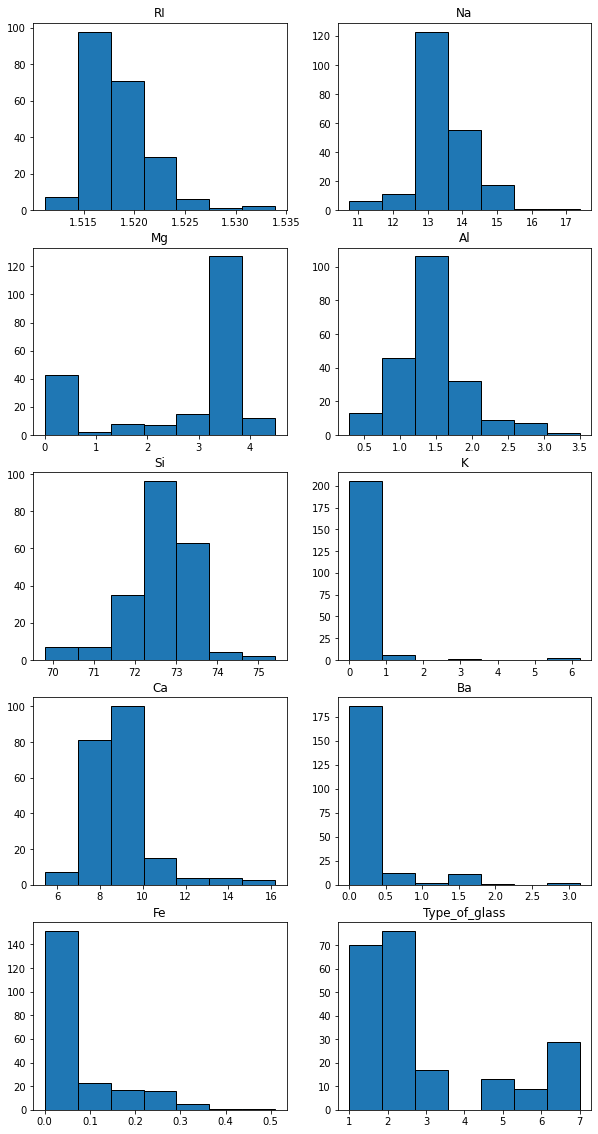

In [ ]:
fig, ax=plt.subplots(5,2, figsize=(10,20))

#Subplot do atributo RI 
ax[0,0].hist(dataset_glass_sem_id_number['RI'], bins=7, edgecolor='black')
ax[0,0].set_title('RI')

#Subplot do atributo Na
ax[0,1].hist(dataset_glass_sem_id_number['Na'], bins= 7, edgecolor='black')
ax[0,1].set_title('Na')

#Subplot do atributo Mg
ax[1,0].hist(dataset_glass_sem_id_number['Mg'], bins=7, edgecolor='black')
ax[1,0].set_title('Mg')

#Subplot do atributo Al
ax[1,1].hist(dataset_glass_sem_id_number['Al'], bins=7, edgecolor='black')
ax[1,1].set_title('Al')

#Subplot do atributo Si
ax[2,0].hist(dataset_glass_sem_id_number['Si'], bins=7, edgecolor='black')
ax[2,0].set_title('Si')

#Subplot do atributo K
ax[2,1].hist(dataset_glass_sem_id_number['K'], bins=7, edgecolor='black')
ax[2,1].set_title('K')

#Subplot do atributo Ca
ax[3,0].hist(dataset_glass_sem_id_number['Ca'], bins=7, edgecolor='black')
ax[3,0].set_title('Ca')

#Subplot do atributo Ba
ax[3,1].hist(dataset_glass_sem_id_number['Ba'], bins=7, edgecolor='black')
ax[3,1].set_title('Ba')

#Subplot do atributo Fe
ax[4,0].hist(dataset_glass_sem_id_number['Fe'], bins=7, edgecolor='black')
ax[4,0].set_title('Fe')

#Subplot do atributo Type_of_glass
ax[4,1].hist(dataset_glass_sem_id_number['Type_of_glass'], bins=7, edgecolor='black')
ax[4,1].set_title('Type_of_glass')
plt.show()

Gráficos de densidade

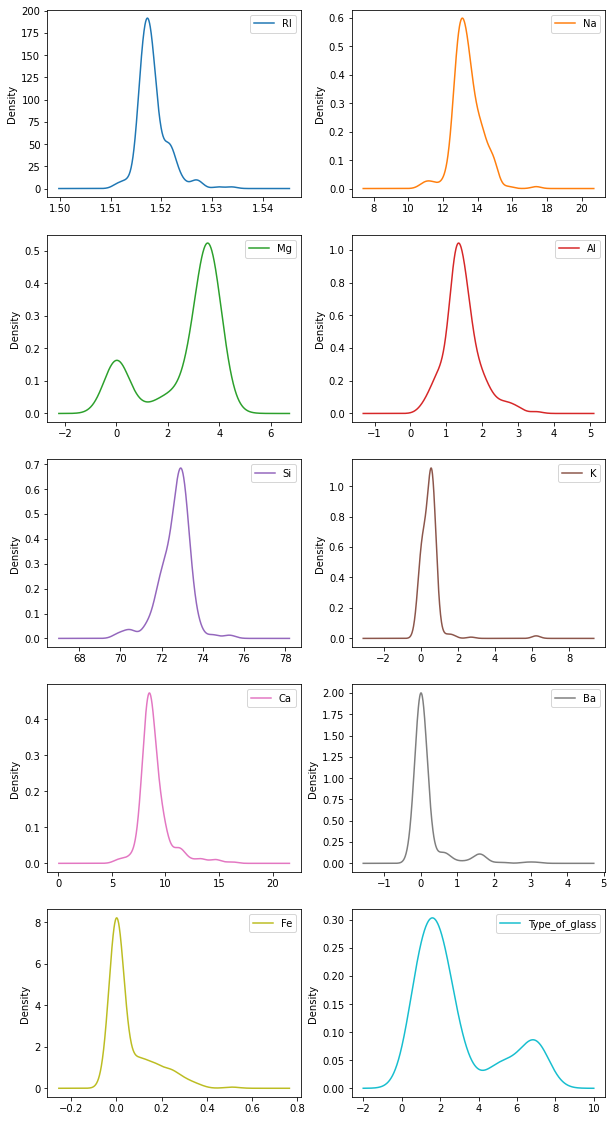

In [ ]:
dataset_glass_sem_id_number.plot(kind = 'density', subplots = True, layout = (5,2), sharex = False, figsize = (10,20))
plt.show()

Ressalvadas as devidas proporções, os histogramas e os gráficos de densidade acima permitem supor a possibilidade de aproximação dos atributos RI, Na, Al, Si e Ca para uma distribuição normal.

Boxplots dos atributos

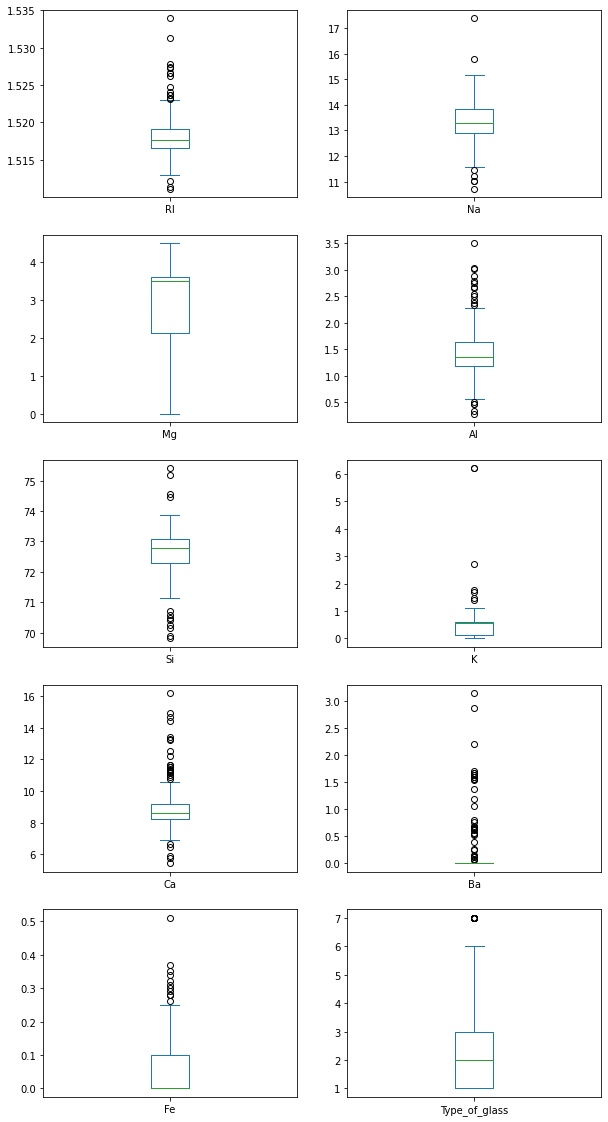

In [ ]:
dataset_glass_sem_id_number.plot(kind = 'box', subplots = True, layout = (5,2), sharex = False, sharey = False, figsize = (10,20))
plt.show()

A análise dos bloxplots corrobora, de forma gráfica, a análise dos coeficientes de variação realizada anteriormente, indicando, ainda, os outliers. Quando a distância entre o 1º quartil (linha inferior) e a mediana (linha do centro) e a distânca entre o 3º quartil (linha superior) e a mediana são próximas, a dispersão dos dados é menor, e vice-versa.

Gráfico de pizza

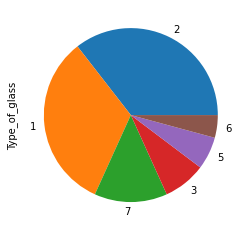

In [ ]:
dataset_glass_sem_id_number['Type_of_glass'].value_counts(normalize=True).plot.pie();

O gráfico de pizza corrobora, de forma gráfica, o desbalanceamento das classes, verificado anteriormente.

### 3.3. Visualizações multimodais

Matriz de correlação

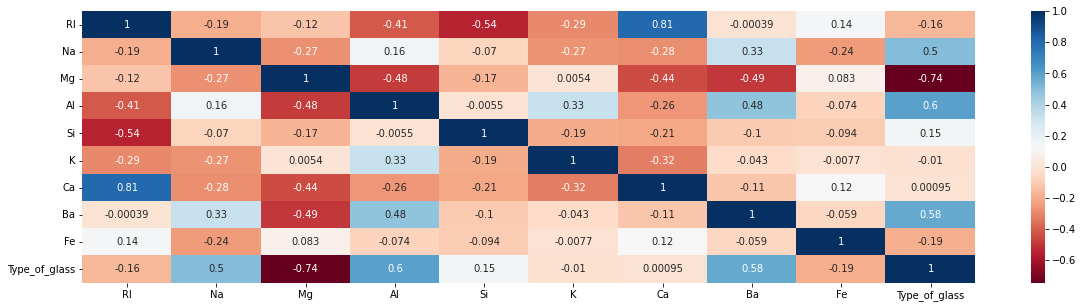

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(dataset_glass_sem_id_number.corr(), annot=True, cmap='RdBu');

Scatter Plot

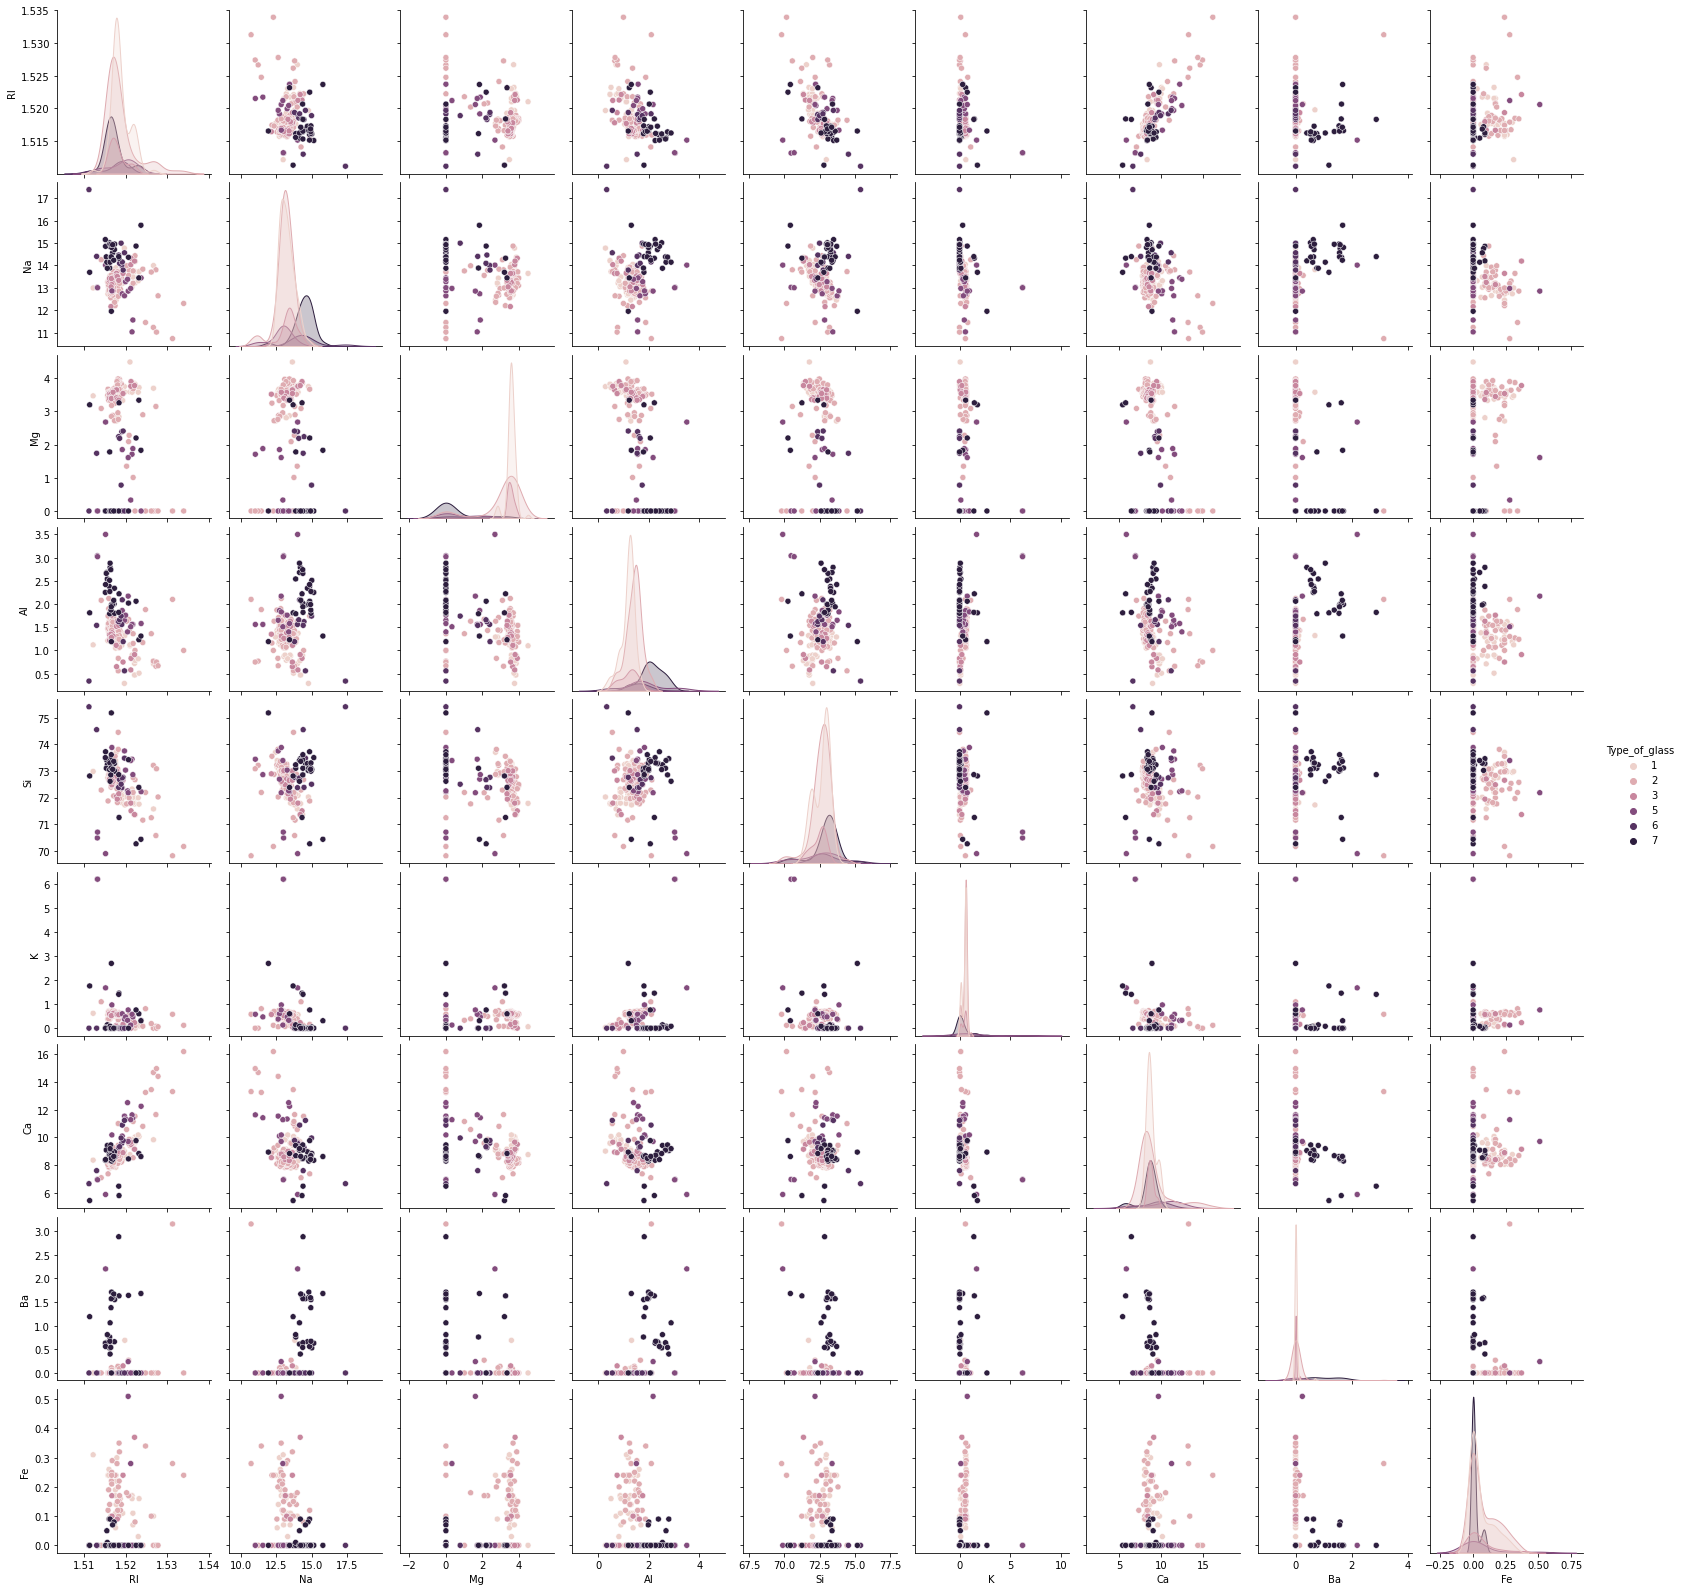

In [ ]:
sns.pairplot(dataset_glass_sem_id_number, hue = "Type_of_glass", height = 2.5);

A partir da Matriz de Correlação e do Scatter Plot acima é possível verificar que alguns atributos possuem certo grau de correlação entre si, como por exemplo RI e Ca (coeficiente de correlação = 0,81) e RI e Si (coeficiente de correlação = -0,54). Além disso, nota-se certa correlação entre os atributos Mg, Al e Ba e o tipo de vidro (classe), cujos coeficientes de correlação de Pearson são, respectivamente, -0,74, 0,6 e 0,58. Essas informações podem indicar a necessidade de seleção de atributos mais relevantes ao modelo (feature selection), em detrimento de utilizar todas as variáveis.

## 4. Pré-processamento de dados


Para este projeto, a etapa de pré-processamento consiste nas etapas de remoção de linhas duplicadas, tratamento de missings e limpeza, feature selection e separação do dataset em conjunto de treino e conjunto de teste.

### 4.1. Remoção de duplicatas

In [ ]:
# Identificar linhas duplicadas
print(dataset_glass_sem_id_number[dataset_glass_sem_id_number.duplicated()])
print(dataset_glass_sem_id_number[dataset_glass_sem_id_number['RI']==1.52213])

         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type_of_glass
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0              1
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type_of_glass
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0              1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0              1


In [ ]:
# Gravar o dataset sem duplicatas
dataset_glass_sem_id_number_sem_duplic = dataset_glass_sem_id_number.drop_duplicates()

In [ ]:
# Verificar as dimensões do dataset sem duplicatas
dataset_glass_sem_id_number_sem_duplic.shape

(213, 10)

### 4.2. Tratamento de Missings e Limpeza

Verificação de nulos

In [ ]:
dataset_glass_sem_id_number_sem_duplic.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

Verifica-se que aparentemente, não há nulos. Porém, para se afirmar isso, deve-se pesquisar a composição elemental de cada tipo de vidro no dataset e conferir com os "zeros" de cada atributo.

Para preservar o dataset original, é recomendável criar uma cópia dele.

In [ ]:
# Salvando uma cópia do dataset
dataset_missings=dataset_glass_sem_id_number_sem_duplic.copy()

Para poder visualizar onde está a concentração de zeros, será plotada a matrix de missings. Para isso, os zeros serão substituídos por NAN. 

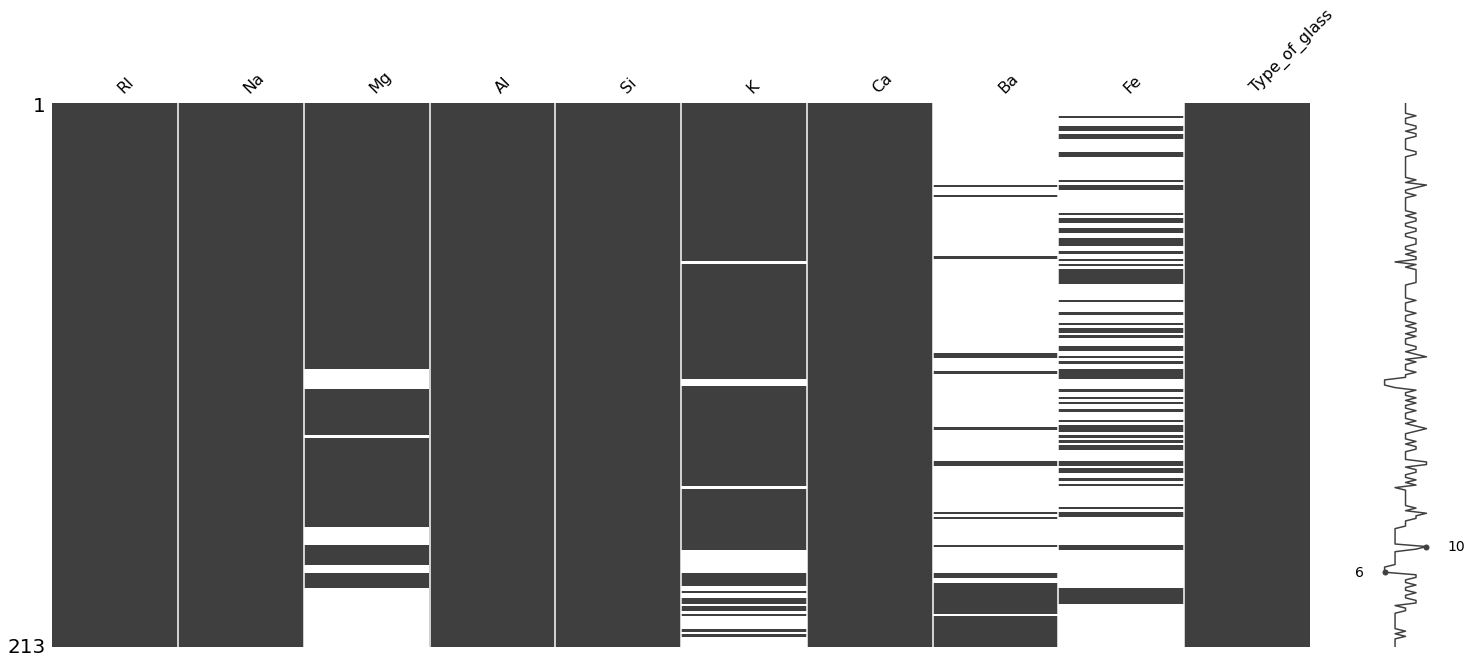

In [ ]:
# Substituindo zeros por NAN
dataset_missings.replace(0,np.nan,inplace=True)
ms.matrix(dataset_missings);

Com a visualização, verifica-se que a presença de zeros concentra-se nos atributos Mg, K, Ba e Fe.  Nesse sentido, é importante averiguar se a não incidência desses elementos pode estar relacionada a algum tipo específico de vidro, conforme análise a seguir:

In [ ]:
# Verificar não incidência de Mg
dataset_missings[dataset_missings['Mg']==0]['Type_of_glass'].value_counts(normalize=True)

Series([], Name: Type_of_glass, dtype: float64)

In [ ]:
# Verificar não incidência de K
dataset_missings[dataset_missings['K']==0]['Type_of_glass'].value_counts(normalize=True)

Series([], Name: Type_of_glass, dtype: float64)

In [ ]:
# Verificar não incidência de Fe
dataset_missings[dataset_missings['Fe']==0]['Type_of_glass'].value_counts(normalize=True)

Series([], Name: Type_of_glass, dtype: float64)

In [ ]:
# Verificar não incidência de Ba
dataset_missings[dataset_missings['Ba']==0]['Type_of_glass'].value_counts(normalize=True)

Series([], Name: Type_of_glass, dtype: float64)

É possível observar que a princípio existe uma diferença da não incidência dos elementos Mg, K, Ba e Fe entre os tipos de vidro. Tomando como exemplo a classe 7 (headlamps), cerca de 54,8% dos valores zerados de Mg estão nessa classe, enquanto aproximadamente 1,7% dos valores zerados de Ba estão nessa classe. Já na classe 2 (building_windows_non_float_processed) cerca 30,8% dos valores zerados de Fe estão nessa classe, enquanto aproximadamente 10,0% dos valores zerados de K estão nessa classe.

Ao realizar pesquisa sobre a composição de alguns tipos de vidro, verificou-se que determinados elementos podem se apresentar em pequena quantidade ao até mesmo não estar na composição, conforme quadros abaixo: 

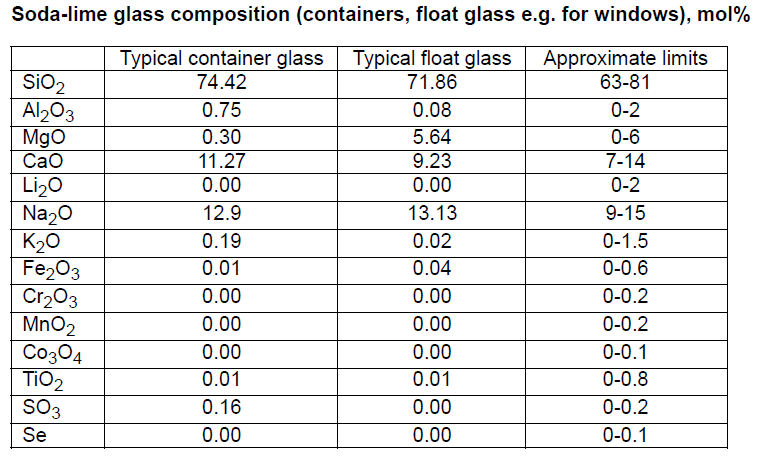

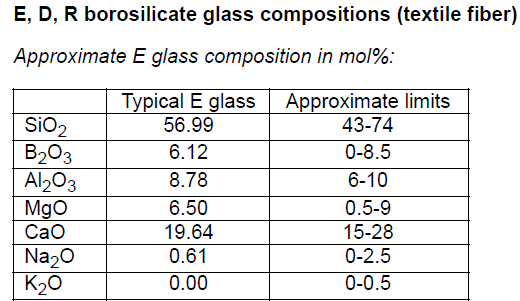
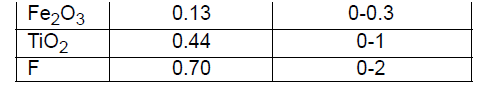

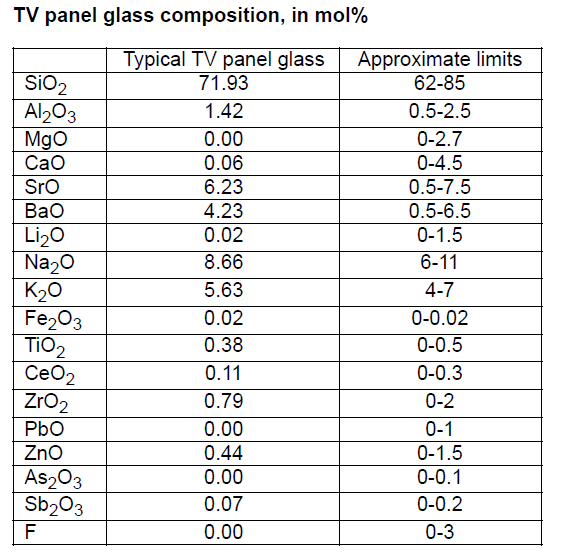

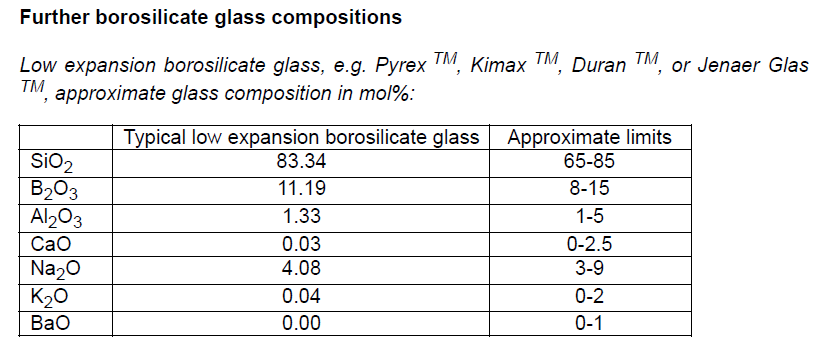

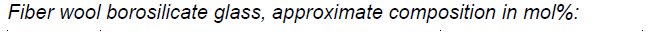
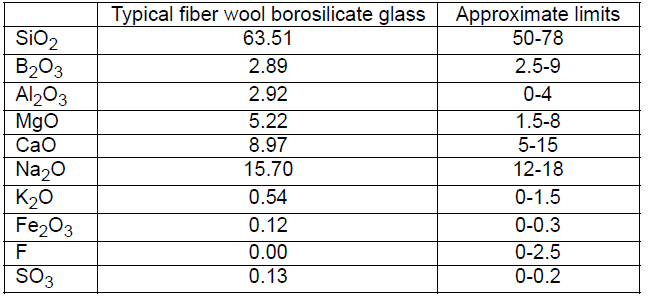

Fonte: https://glassproperties.com/glasses/

Uma vez que, aparentemente, a não incidência dos elementos Mg, K, Ba e Fe em alguns tipos de vidro não se trata de uma anomalia, em um primeiro momento não serão removidas as instâncias com valores zerados.

### 4.3. Feature Selection

In [ ]:
# Separação do dados entre os atributos e o target
array=dataset_glass_sem_id_number_sem_duplic.values
X=array[:,0:9]
y=array[:,9]
seed=7

Seleção univariada


In [ ]:
# Número de atributos a serem selecionados
k=5 

# Função para seleção de atributos
best_var = SelectKBest(score_func=f_classif, k=k)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset_glass_sem_id_number_sem_duplic.columns[0:9])

# Exibe as pontuações de cada atributo e os escolhidos (com as pontuações mais altas)
set_printoptions(precision=3)
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset_glass_sem_id_number_sem_duplic.columns[0:9]))

# Imprime o dataset apenas com as colunas selecionadas
print("\n", features)


Número original de atributos: 9

Número reduzido de atributos: 5

Atributos Originais: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

Scores dos Atributos Originais: [ 1.558 28.886 64.963 35.486  2.774  8.7    2.985 38.741  2.703]

Atributos Selecionados: ['Na' 'Mg' 'Al' 'K' 'Ba']

 [[13.64  4.49  1.1   0.06  0.  ]
 [13.89  3.6   1.36  0.48  0.  ]
 [13.53  3.55  1.54  0.39  0.  ]
 ...
 [14.36  0.    2.02  0.    1.64]
 [14.38  0.    1.94  0.    1.57]
 [14.23  0.    2.08  0.    1.67]]


Eliminação recursiva de atributos

In [ ]:
# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Variáveis
rfe = RFE(modelo, n_features_to_select=k)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset_glass_sem_id_number_sem_duplic.columns[0:9])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados" 
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset_glass_sem_id_number_sem_duplic.columns[0:9]))

Atributos Originais: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

Atributos Selecionados: [False False  True  True False  True  True  True False]

Ranking de atributos: [5 2 1 1 4 1 1 1 3]

Qtd de melhores Atributos: 5

Nomes dos Atributos Selecionados: ['Mg' 'Al' 'K' 'Ca' 'Ba']


Importância de Atributos com ExtraTrees

In [ ]:
# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset_glass_sem_id_number_sem_duplic.columns[0:9])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo)
print(modelo.feature_importances_)


Atributos Originais: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')
[0.136 0.107 0.171 0.148 0.085 0.101 0.127 0.072 0.053]


Resumo:


1.   Seleção univariada: ['Na' 'Mg' 'Al' 'K' 'Ba']
2.   Eliminação recursiva de atributos: ['Mg' 'Al' 'K' 'Ca' 'Ba']
3.   Importância de atributos com extraTrees: ['Mg' 'Al' 'RI' 'Ca' 'K']






Percebe-se que os atributos Mg, Al, K e Ba aparecem tanto no resultado da seleção univariada quanto no resultado da eliminação recursiva de atributos. Mg, Al e K também aparecem na importância de atributos com extraTrees. Ca aparece tanto na eliminação recursiva quanto na importância de atributos com extraTress. Visto isso, pode-se criar uma versão do dataset com somente os 5 atributos mencionados anteriormente.

Mais uma vez, é uma boa prática fazer uma cópia do dataset.

In [ ]:
# Efetua cópia do dataset
dataset_feature_selection=dataset_glass_sem_id_number_sem_duplic.copy()

In [ ]:
# Elimina atributos
dataset_feature_selection.drop(['RI','Na','Si','Fe'], axis=1,inplace=True)

In [ ]:
dataset_feature_selection.head()

,Mg,Al,K,Ca,Ba,Type_of_glass
0,4.49,1.10,0.06,8.75,0.0,1
1,3.60,1.36,0.48,7.83,0.0,1
2,3.55,1.54,0.39,7.78,0.0,1
3,3.69,1.29,0.57,8.22,0.0,1
4,3.62,1.24,0.55,8.07,0.0,1


### 4.4. Separação em conjunto de treino e conjunto de teste

Essa etapa consiste em separar o dataset em conjunto de treino e teste. 80% dos dados serão utilizados para treino e 20% para teste. O procedimento será realizado tanto para o dataset sem feature selection quanto para o dataset com feature selection.


In [ ]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste
array = dataset_glass_sem_id_number_sem_duplic.values
X_ms = array[:,0:9]
y = array[:,9]
X_train_ms, X_test_ms, y_train_ms, y_test_ms = train_test_split(X_ms, y,test_size=test_size, shuffle=True, random_state=seed, stratify=y) 

Fazendo o mesmo para o dataset depois da seleção de atributos.

In [ ]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste
array = dataset_feature_selection.values
X_ft = array[:,0:5]
y = array[:,5]
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_ft, y,test_size=test_size, shuffle=True, random_state=seed, stratify=y)

## 5. Modelagem de Machine Learning

Esta etapa consiste no treinamento de diversos modelos de machine learning, no intuito de encontrar os que possuem melhor desempenho. Serão avaliados os algoritmos Classificador Dummy, Árvore de Classificação, Regressão Logística, KNN, Naive Bayes, Light Gradient Boosted Machine (LGBM), Extreme Gradient Boosting (XGB), Bagging, Random Forest, Extra Trees, Ada Boost, Gradient Boosting e Voting utilizando diferentes visões de dados: dados brutos com e sem feature selection, dados padronizados com e sem feature selection e dados normalizados com e sem feature selection.

Parâmetros de Cross Validation

In [ ]:
num_particoes = 10
seed = 7
scoring='accuracy'
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

### 5.1. Dataset sem Feature Selection



Classificador Dummy

In [ ]:
model = DummyClassifier(strategy="most_frequent")
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'35.88%'

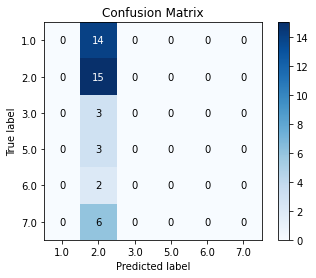

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Árvore de Classificação

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'64.71%'

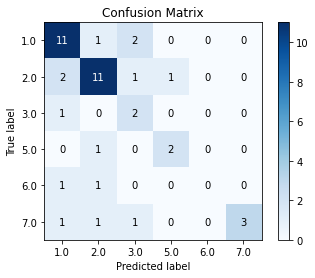

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

SVC

In [ ]:
model = SVC(gamma='auto')
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'67.06%'

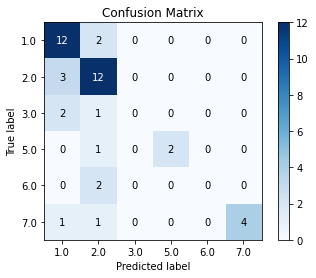

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

KNN

In [ ]:
model = SVC(kernel = 'linear')
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'62.94%'

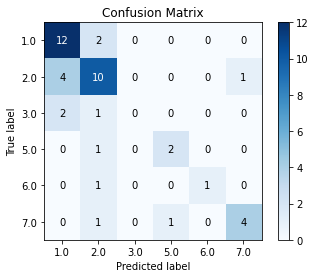

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'46.47%'

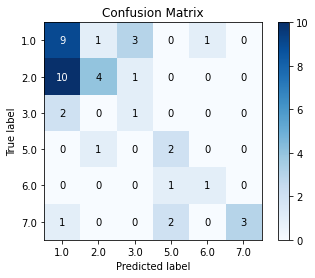

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Regressão Logística

In [ ]:
model=LogisticRegression()
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'59.41%'

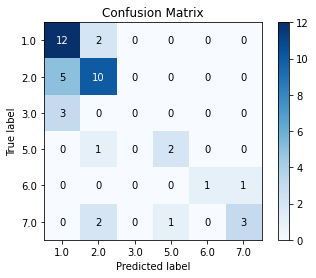

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

LGBM

In [ ]:
model=LGBMClassifier(random_state=seed, n_jobs=-1)
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'71.76%'

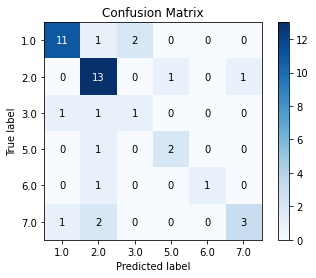

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

XGBoost

In [ ]:
model=xgb.XGBClassifier()
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'71.76%'

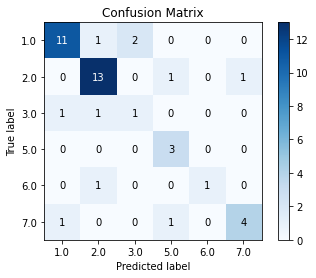

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Bagging

In [ ]:
# definindo os parâmetros do classificador base
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

model=BaggingClassifier(base_estimator=base, n_estimators=num_trees)
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'75.88%'

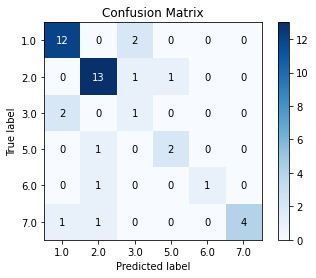

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Random Forest

In [ ]:
# definindo os parâmetros do classificador base
num_trees = 100
max_features = 3

model=RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'75.29%'

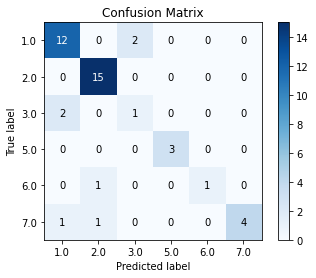

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Extra Trees

In [ ]:
# definindo os parâmetros do classificador base
num_trees = 100
max_features = 3

model=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'75.88%'

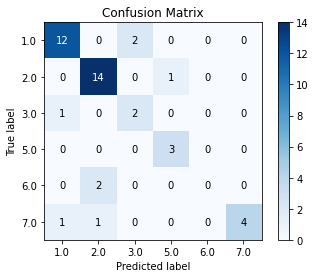

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Ada Boost

In [ ]:
# definindo os parâmetros do classificador base
num_trees = 100

model=AdaBoostClassifier(n_estimators=num_trees)
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'35.88%'

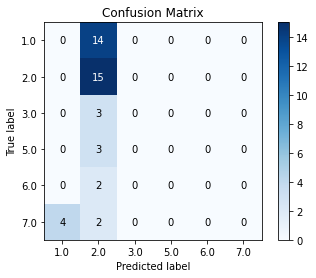

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Gradient Boosting

In [ ]:
# definindo os parâmetros do classificador base
num_trees = 100

model=GradientBoostingClassifier(n_estimators=num_trees)
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'67.65%'

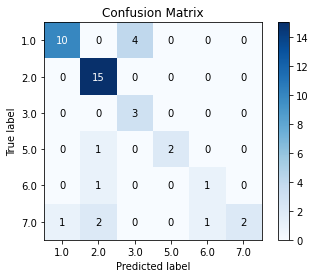

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

Voting

In [ ]:
# criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

model=VotingClassifier(bases)
model.fit(X_train_ms,y_train_ms)
y_predicted = model.predict(X_test_ms)

# cross validation
results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'57.65%'

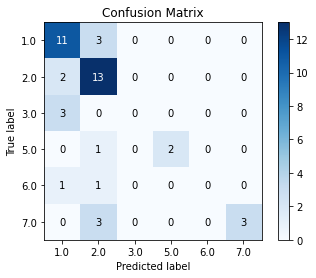

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

### 5.2. Dataset com Feature Selection

Classificador Dummy

In [ ]:
model = DummyClassifier(strategy="most_frequent")
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'35.88%'

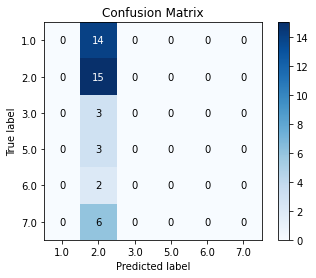

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Árvore de Classificação

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'63.53%'

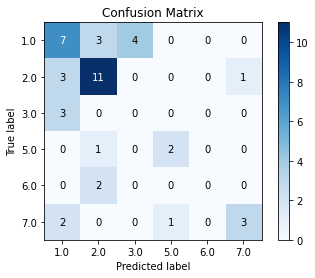

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ms,y_predicted, normalize = False)

SVC

In [ ]:
model = SVC(gamma='auto')
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'65.29%'

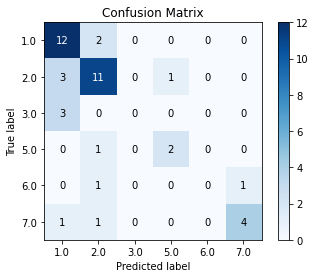

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

KNN

In [ ]:
model = SVC(kernel = 'linear')
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'60.0%'

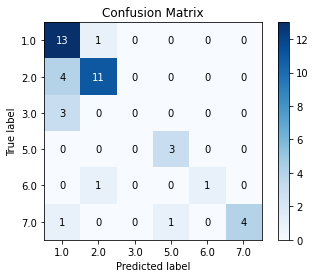

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'45.29%'

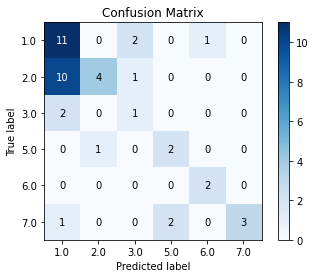

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Regressão Logística

In [ ]:
model=LogisticRegression()
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'58.24%'

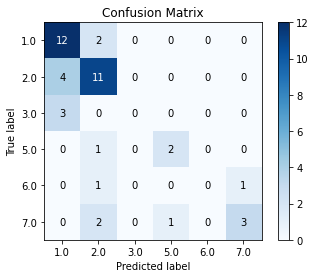

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

LGBM

In [ ]:
model=LGBMClassifier(random_state=seed, n_jobs=-1)
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'70.59%'

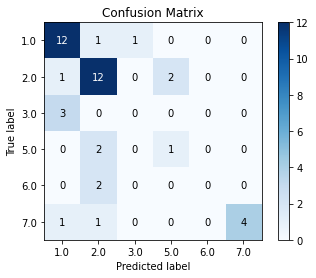

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

XGBoost

In [ ]:
model=xgb.XGBClassifier()
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'64.71%'

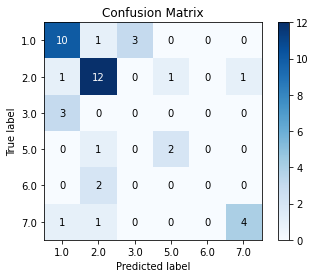

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Bagging

In [ ]:
# definindo os parâmetros do classificador base
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

model=BaggingClassifier(base_estimator=base, n_estimators=num_trees)
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'72.94%'

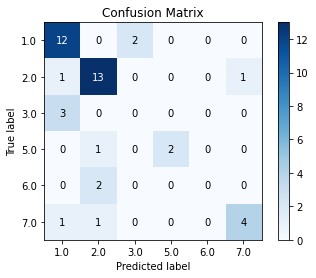

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Random Forest

In [ ]:
# definindo os parâmetros do classificador base
num_trees = 100
max_features = 3

model=RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'74.71%'

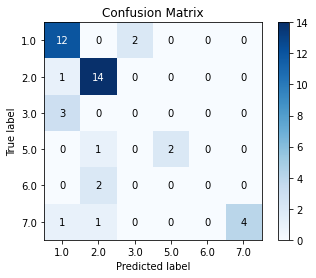

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Extra Trees

In [ ]:
# definindo os parâmetros do classificador base
num_trees = 100
max_features = 3

model=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'72.35%'

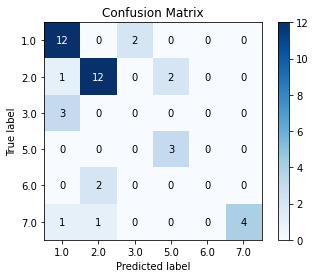

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Ada Boost

In [ ]:
# definindo os parâmetros do classificador base
num_trees = 100

model=AdaBoostClassifier(n_estimators=num_trees)
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'47.65%'

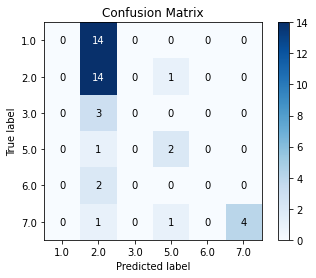

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Gradient Boosting

In [ ]:
# definindo os parâmetros do classificador base
num_trees = 100

model=GradientBoostingClassifier(n_estimators=num_trees)
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'65.88%'

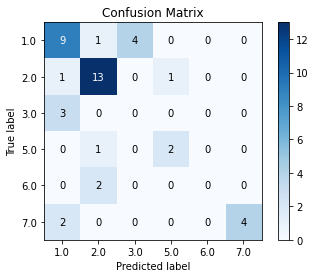

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

Voting

In [ ]:
# criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

model=VotingClassifier(bases)
model.fit(X_train_ft,y_train_ft)
y_predicted = model.predict(X_test_ft)

# cross validation
results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)

# acurácia
acc = results.mean()
acc = np.round(np.mean(acc)*100,2).astype(str)+ '%'
acc

'58.82%'

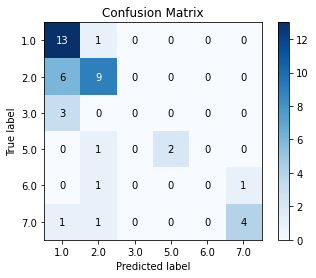

In [ ]:
# matriz de confusão
mt.plot_confusion_matrix(y_test_ft,y_predicted, normalize = False)

## 6.Pipelines

### 6.1. Pipelines dos modelos sem Feature Selection

In [ ]:
from os import setegid
np.random.seed(7) # definindo uma semente global

# definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# setando o seed usado no cross validation
pipelines = []
results = []
names = []

# dados brutos
pipelines.append(('Dummy', Pipeline([('Dummy', DummyClassifier(strategy="most_frequent"))])))
pipelines.append(('CART', Pipeline([('CART', DecisionTreeClassifier())])))
pipelines.append(('LR', Pipeline([('LR', LogisticRegression(max_iter=200))])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsClassifier())])))
pipelines.append(('NB', Pipeline([('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('SVM', SVC(gamma='auto'))])))
pipelines.append(('LGBM', Pipeline([('LGBM', LGBMClassifier(random_state=seed, n_jobs=-1))])))
pipelines.append(('XGB', Pipeline([('XGB', xgb.XGBClassifier())])))
pipelines.append(('Bagging', Pipeline([('Bagging',BaggingClassifier(base_estimator=base, n_estimators=num_trees))])))
pipelines.append(('RF', Pipeline([('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('ET', Pipeline([('ET',ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('Ada', Pipeline([('Ada',AdaBoostClassifier(n_estimators=num_trees))])))
pipelines.append(('GB', Pipeline([('GB',GradientBoostingClassifier(n_estimators=num_trees))])))
pipelines.append(('Voting', Pipeline([('Voting',VotingClassifier(bases))])))

# dados padronizados
pipelines.append(('PadrDummy', Pipeline([('StandardScaler', StandardScaler()),('Dummy', DummyClassifier(strategy="most_frequent"))])))
pipelines.append(('PadrCART', Pipeline([('StandardScaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('PadrLR', Pipeline([('StandardScaler', StandardScaler()),('LR', LogisticRegression(max_iter=200))])))
pipelines.append(('PadrKNN', Pipeline([('StandardScaler', StandardScaler()),('KNN', KNeighborsClassifier(metric='manhattan'))])))
pipelines.append(('PadrNB', Pipeline([('StandardScaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('PadrSVM', Pipeline([('StandardScaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('PadrLGBM', Pipeline([('StandardScaler', StandardScaler()),('LGBM', LGBMClassifier(random_state=seed, n_jobs=-1))])))
pipelines.append(('PadrXGB', Pipeline([('StandardScaler', StandardScaler()),('XGB', xgb.XGBClassifier())])))
pipelines.append(('PadrBagging', Pipeline([('StandardScaler', StandardScaler()),('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees))])))
pipelines.append(('PadrRF', Pipeline([('StandardScaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('PadrET', Pipeline([('StandardScaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('PadrAda', Pipeline([('StandardScaler', StandardScaler()),('Ada', AdaBoostClassifier(n_estimators=num_trees))])))
pipelines.append(('PadrGB', Pipeline([('StandardScaler', StandardScaler()),('GB', GradientBoostingClassifier(n_estimators=num_trees))])))
pipelines.append(('PadrVoting', Pipeline([('StandardScaler', StandardScaler()),('Voting', VotingClassifier(bases))])))

# dados normalizados
pipelines.append(('NormDummy', Pipeline([('MinMaxScaler', StandardScaler()),('Dummy', DummyClassifier(strategy="most_frequent"))])))
pipelines.append(('NormCART', Pipeline([('MinMaxScaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NormLR', Pipeline([('MinMaxScaler', MinMaxScaler()),('LR', LogisticRegression(max_iter=200))])))
pipelines.append(('NormKNN', Pipeline([('MinMaxScaler', MinMaxScaler()),('KNN', KNeighborsClassifier(metric='manhattan'))])))
pipelines.append(('NormNB', Pipeline([('MinMaxScaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('NormSVM', Pipeline([('MinMaxScaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('NormLGBM', Pipeline([('MinMaxScaler', MinMaxScaler()),('LGBM', LGBMClassifier(random_state=seed, n_jobs=-1))])))
pipelines.append(('NormXGB', Pipeline([('MinMaxScaler', MinMaxScaler()),('XGB', xgb.XGBClassifier())])))
pipelines.append(('NormBagging', Pipeline([('MinMaxScaler', MinMaxScaler()),('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees))])))
pipelines.append(('NormRF', Pipeline([('MinMaxScaler', MinMaxScaler()),('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('NormET', Pipeline([('MinMaxScaler', MinMaxScaler()),('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('NormAda', Pipeline([('MinMaxScaler', MinMaxScaler()),('Ada', AdaBoostClassifier(n_estimators=num_trees))])))
pipelines.append(('NormGB', Pipeline([('MinMaxScaler', MinMaxScaler()),('GB', GradientBoostingClassifier(n_estimators=num_trees))])))
pipelines.append(('NormVoting', Pipeline([('MinMaxScaler', MinMaxScaler()),('Voting', VotingClassifier(bases))])))

# dataframe
df_pipe_ms = pd.DataFrame()

# resultados
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train_ms, y_train_ms, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = pd.Series([name, round(cv_results.mean(),3), round(cv_results.std(),3)])
  df_pipe_ms=df_pipe_ms.append(msg,ignore_index=True)

In [ ]:
df_pipe_ms.columns = ['Modelo', 'Acurácia (Sem Feature Selection)', 'Desvio Padrão (Sem Feature Selection)']
df_pipe_ms = df_pipe_ms.sort_values(by=['Acurácia (Sem Feature Selection)'], ascending=False).reset_index()
df_pipe_ms

,index,Modelo,Acurácia (Sem Feature Selection),Desvio Padrão (Sem Feature Selection)
0,38,NormET,0.759,0.103
1,24,PadrET,0.747,0.099
2,23,PadrRF,0.747,0.118
3,8,Bagging,0.747,0.091
4,36,NormBagging,0.741,0.106
5,37,NormRF,0.741,0.118
6,22,PadrBagging,0.735,0.099
7,9,RF,0.729,0.115
8,10,ET,0.729,0.112
9,20,PadrLGBM,0.718,0.073


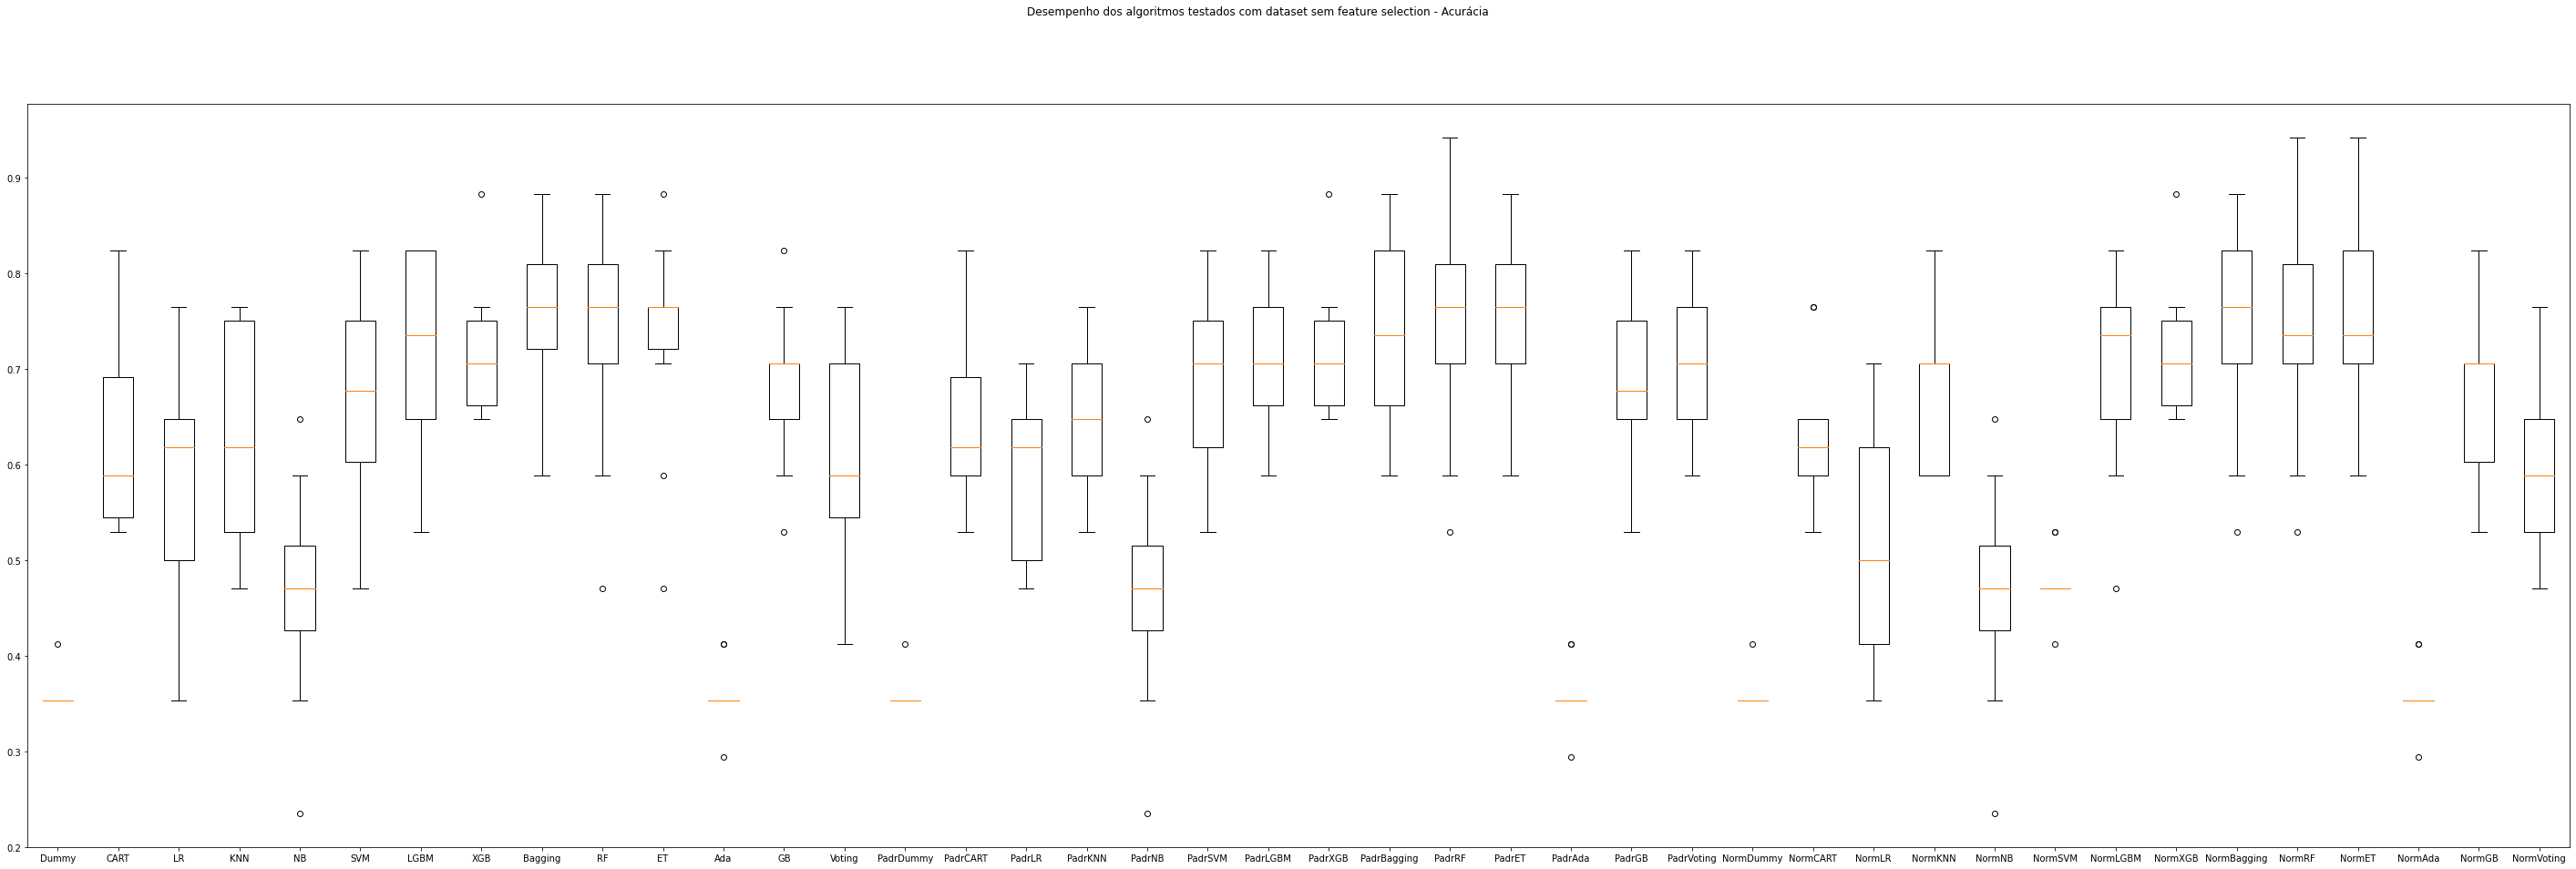

In [ ]:
# plotando resultados
fig = plt.figure(figsize=(50,15)) 
fig.suptitle('Desempenho dos algoritmos testados com dataset sem feature selection - Acurácia') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show() 

### 6.2. Pipelines dos modelos com Feature Selection

In [ ]:
from os import setegid
np.random.seed(7) # definindo uma semente global

# definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# setando o seed usado no cross validation
pipelines = []
results = []
names = []

# dados brutos
pipelines.append(('Dummy', Pipeline([('Dummy', DummyClassifier(strategy="most_frequent"))])))
pipelines.append(('CART', Pipeline([('CART', DecisionTreeClassifier())])))
pipelines.append(('LR', Pipeline([('LR', LogisticRegression(max_iter=200))])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsClassifier())])))
pipelines.append(('NB', Pipeline([('NB', GaussianNB())])))
pipelines.append(('SVM', Pipeline([('SVM', SVC(gamma='auto'))])))
pipelines.append(('LGBM', Pipeline([('LGBM', LGBMClassifier(random_state=seed, n_jobs=-1))])))
pipelines.append(('XGB', Pipeline([('XGB', xgb.XGBClassifier())])))
pipelines.append(('Bagging', Pipeline([('Bagging',BaggingClassifier(base_estimator=base, n_estimators=num_trees))])))
pipelines.append(('RF', Pipeline([('RF',RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('ET', Pipeline([('ET',ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('Ada', Pipeline([('Ada',AdaBoostClassifier(n_estimators=num_trees))])))
pipelines.append(('GB', Pipeline([('GB',GradientBoostingClassifier(n_estimators=num_trees))])))
pipelines.append(('Voting', Pipeline([('Voting',VotingClassifier(bases))])))

# dados padronizados
pipelines.append(('PadrDummy', Pipeline([('StandardScaler', StandardScaler()),('Dummy', DummyClassifier(strategy="most_frequent"))])))
pipelines.append(('PadrCART', Pipeline([('StandardScaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('PadrLR', Pipeline([('StandardScaler', StandardScaler()),('LR', LogisticRegression(max_iter=200))])))
pipelines.append(('PadrKNN', Pipeline([('StandardScaler', StandardScaler()),('KNN', KNeighborsClassifier(metric='manhattan'))])))
pipelines.append(('PadrNB', Pipeline([('StandardScaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('PadrSVM', Pipeline([('StandardScaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('PadrLGBM', Pipeline([('StandardScaler', StandardScaler()),('LGBM', LGBMClassifier(random_state=seed, n_jobs=-1))])))
pipelines.append(('PadrXGB', Pipeline([('StandardScaler', StandardScaler()),('XGB', xgb.XGBClassifier())])))
pipelines.append(('PadrBagging', Pipeline([('StandardScaler', StandardScaler()),('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees))])))
pipelines.append(('PadrRF', Pipeline([('StandardScaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('PadrET', Pipeline([('StandardScaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('PadrAda', Pipeline([('StandardScaler', StandardScaler()),('Ada', AdaBoostClassifier(n_estimators=num_trees))])))
pipelines.append(('PadrGB', Pipeline([('StandardScaler', StandardScaler()),('GB', GradientBoostingClassifier(n_estimators=num_trees))])))
pipelines.append(('PadrVoting', Pipeline([('StandardScaler', StandardScaler()),('Voting', VotingClassifier(bases))])))

# dados normalizados
pipelines.append(('NormDummy', Pipeline([('MinMaxScaler', StandardScaler()),('Dummy', DummyClassifier(strategy="most_frequent"))])))
pipelines.append(('NormCART', Pipeline([('MinMaxScaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NormLR', Pipeline([('MinMaxScaler', MinMaxScaler()),('LR', LogisticRegression(max_iter=200))])))
pipelines.append(('NormKNN', Pipeline([('MinMaxScaler', MinMaxScaler()),('KNN', KNeighborsClassifier(metric='manhattan'))])))
pipelines.append(('NormNB', Pipeline([('MinMaxScaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('NormSVM', Pipeline([('MinMaxScaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('NormLGBM', Pipeline([('MinMaxScaler', MinMaxScaler()),('LGBM', LGBMClassifier(random_state=seed, n_jobs=-1))])))
pipelines.append(('NormXGB', Pipeline([('MinMaxScaler', MinMaxScaler()),('XGB', xgb.XGBClassifier())])))
pipelines.append(('NormBagging', Pipeline([('MinMaxScaler', MinMaxScaler()),('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees))])))
pipelines.append(('NormRF', Pipeline([('MinMaxScaler', MinMaxScaler()),('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('NormET', Pipeline([('MinMaxScaler', MinMaxScaler()),('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))])))
pipelines.append(('NormAda', Pipeline([('MinMaxScaler', MinMaxScaler()),('Ada', AdaBoostClassifier(n_estimators=num_trees))])))
pipelines.append(('NormGB', Pipeline([('MinMaxScaler', MinMaxScaler()),('GB', GradientBoostingClassifier(n_estimators=num_trees))])))
pipelines.append(('NormVoting', Pipeline([('MinMaxScaler', MinMaxScaler()),('Voting', VotingClassifier(bases))])))

# dataframe
df_pipe_ft = pd.DataFrame()

# resultados
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train_ft, y_train_ft, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = pd.Series([name, round(cv_results.mean(),3), round(cv_results.std(),3)])
  df_pipe_ft=df_pipe_ft.append(msg,ignore_index=True)

In [ ]:
df_pipe_ft.columns = ['Modelo', 'Acurácia (Com Feature Selection)', 'Desvio Padrão (Com Feature Selection)']
df_pipe_ft = df_pipe_ft.sort_values(by=['Acurácia (Com Feature Selection)'], ascending=False).reset_index()
df_pipe_ft

,index,Modelo,Acurácia (Com Feature Selection),Desvio Padrão (Com Feature Selection)
0,9,RF,0.741,0.106
1,23,PadrRF,0.735,0.115
2,22,PadrBagging,0.735,0.115
3,38,NormET,0.729,0.124
4,36,NormBagging,0.718,0.098
5,8,Bagging,0.718,0.114
6,37,NormRF,0.718,0.111
7,10,ET,0.712,0.119
8,34,NormLGBM,0.706,0.126
9,24,PadrET,0.706,0.118


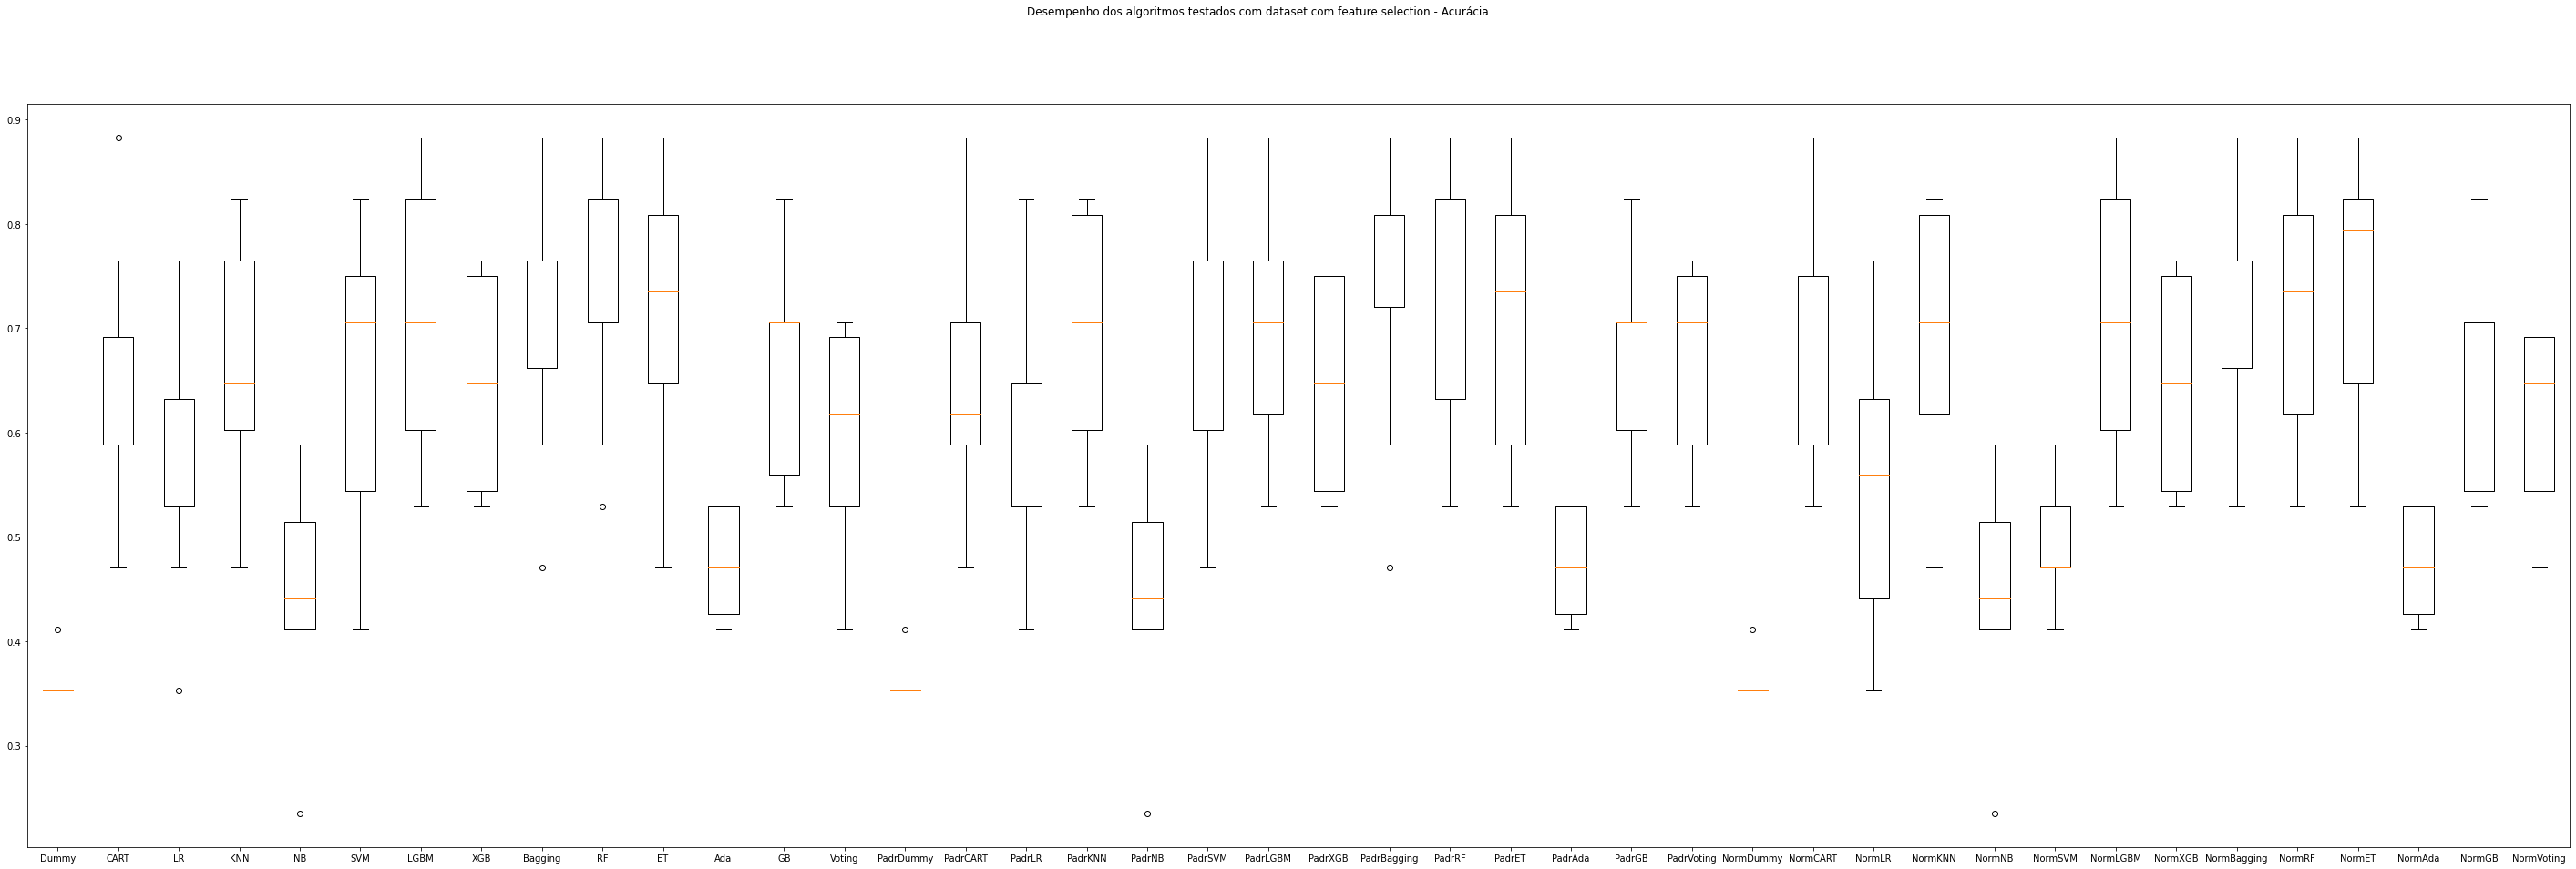

In [ ]:
# plotando resultados
fig = plt.figure(figsize=(50,15)) 
fig.suptitle('Desempenho dos algoritmos testados com dataset com feature selection - Acurácia') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show() 

### 6.3. Comparação de resultados: com feature selection x sem feature selection

In [ ]:
df_pipe_ms.merge(df_pipe_ft, left_on='Modelo', right_on='Modelo').reset_index()

,index,index_x,Modelo,Acurácia (Sem Feature Selection),Desvio Padrão (Sem Feature Selection),index_y,Acurácia (Com Feature Selection),Desvio Padrão (Com Feature Selection)
0,0,38,NormET,0.759,0.103,38,0.729,0.124
1,1,24,PadrET,0.747,0.099,24,0.706,0.118
2,2,23,PadrRF,0.747,0.118,23,0.735,0.115
3,3,8,Bagging,0.747,0.091,8,0.718,0.114
4,4,36,NormBagging,0.741,0.106,36,0.718,0.098
5,5,37,NormRF,0.741,0.118,37,0.718,0.111
6,6,22,PadrBagging,0.735,0.099,22,0.735,0.115
7,7,9,RF,0.729,0.115,9,0.741,0.106
8,8,10,ET,0.729,0.112,10,0.712,0.119
9,9,20,PadrLGBM,0.718,0.073,20,0.706,0.105


Neste primeiro experimento foram rodadas 84 configurações: 14 diferentes algoritmos e 6 diferentes visões do dataset.

Para o dataset **sem feature selection**, os modelos com maior acurácia foram: NormET	(0,759), PadrET	(0,747), PadrRF	(0,747) e Bagging	(0,747). Já para o dataset **com feature selection**, os melhores modelos foram RF (0,741), PadrBagging	(0,735), PadrRF	(0,735) e NormET	(0,729). Em geral, os modelos com dataset sem feature selection apresentaram maiores acurácias frente aos modelos com feature selection.

Em todos os modelos elencados acima foram utilizados algoritmos de ensemble. Na etapa a seguir será realizado novo experimento com os algoritmos do tipo não ensemble, os quais apresentaram maiores acurácias, a saber, SVM e KNN. Serão variados os seus respectivos hiperparâmetros, no intuito de buscar configurações que possam alcançar resultados semelhantes aos obtidos com os algoritmos de ensemble.

### 6.4. Ajuste dos Modelos (pipeline + gridsearch)

#### Ajuste do KNN

Para o ajuste do KNN será utilizada a validação cruzada 10-fold. O experimento será realizado com dados brutos, padronizados, normalizados, com feature selection e sem feature selection. Serão avaliadas a métricas de distância euclidiana, manhattan e minkowski e parâmetro k variando de 1 a 20.

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global

pipelines = []

# definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('KNN', Pipeline(steps=[knn])))
pipelines.append(('PadrKNN', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('NormKNN', Pipeline(steps=[min_max_scaler, knn])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'KNN__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Dataset sem feature selection
for name, model in pipelines:    
    # prepara e executa o GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train_ms, y_train_ms)

    # imprime a melhor configuração
    print("Sem feature selection: %s - Melhor: %f usando %s" % (name, round(grid.best_score_,3), grid.best_params_)) 

# Dataset com feature selection
for name, model in pipelines:    
    # prepara e executa o GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train_ft, y_train_ft)

    # imprime a melhor configuração
    print("Com feature selection: %s - Melhor: %f usando %s" % (name, round(grid.best_score_,3), grid.best_params_)) 

Sem feature selection: KNN - Melhor: 0.700000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 1}
Sem feature selection: PadrKNN - Melhor: 0.700000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem feature selection: NormKNN - Melhor: 0.706000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 2}
Com feature selection: KNN - Melhor: 0.724000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 8}
Com feature selection: PadrKNN - Melhor: 0.718000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Com feature selection: NormKNN - Melhor: 0.712000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}


Verifica-se que a melhor confirguração encontrada para o KNN foi utilizando o dataset com feature selection, com dados brutos, distância manhattan e k = 8.

#### Ajuste do SVM

Para o ajuste do SVM também será utilizada a validação cruzada 10-fold. O experimento será realizado com dados brutos, padronizados, normalizados, com feature selection e sem feature selection, variando os parâmetros C e kernel.

In [ ]:
# Tuning do SVM

np.random.seed(7) # definindo uma semente global

pipelines = []

# definindo os componentes do pipeline
svm = ('SVM', SVC())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('SVM', Pipeline(steps=[svm])))
pipelines.append(('PadrSVM', Pipeline(steps=[standard_scaler, svm])))
pipelines.append(('NormSVM', Pipeline(steps=[min_max_scaler, svm])))

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'SVM__C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0],
    'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

# Dataset sem feature selection
for name, model in pipelines:    
    # prepara e executa o GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train_ms, y_train_ms)

    # imprime a melhor configuração
    print("Sem feature selection: %s - Melhor: %f usando %s" % (name, round(grid.best_score_,3), grid.best_params_)) 

# Dataset com feature selection
for name, model in pipelines:    
    # prepara e executa o GridSearchCV
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train_ft, y_train_ft)

    # imprime a melhor configuração
    print("Com feature selection: %s - Melhor: %f usando %s" % (name, round(grid.best_score_,3), grid.best_params_)) 

Sem feature selection: SVM - Melhor: 0.647000 usando {'SVM__C': 2.0, 'SVM__kernel': 'linear'}
Sem feature selection: PadrSVM - Melhor: 0.694000 usando {'SVM__C': 0.8, 'SVM__kernel': 'rbf'}
Sem feature selection: NormSVM - Melhor: 0.682000 usando {'SVM__C': 1.3, 'SVM__kernel': 'poly'}
Com feature selection: SVM - Melhor: 0.618000 usando {'SVM__C': 1.9, 'SVM__kernel': 'linear'}
Com feature selection: PadrSVM - Melhor: 0.676000 usando {'SVM__C': 1.0, 'SVM__kernel': 'rbf'}
Com feature selection: NormSVM - Melhor: 0.671000 usando {'SVM__C': 1.7, 'SVM__kernel': 'rbf'}


Verifica-se que a melhor confirguração encontrada para o SVM foi utilizando o dataset sem feature selection, com dados padronizados, C = 0,8 e kernel = rbf.

### 6.5. Teste de Hipótese para Comparação de Modelos de Machine Learning

Os modelos de machine learning para problemas de classificação geralmente são escolhidos com base em seu desempenho médio. Espera-se que o modelo com maior desempenho seja melhor que o modelo com menor desempenho. No entanto, nem sempre a diferença de desempenho entre os modelos é estatisticamente significativa. Uma das soluções é utilizar um teste de hipótese estatístico para avaliar se a diferença de performance entre os modelos é real ou não.

Dietterich (1998) propôs um método para avaliar a diferença de desempenho entre modelos de machine learning, o qual consiste em utilizar o teste T-Student pareado ajustado aplicando-se validação cruzada 2-fold com 5 repetições (5x2-fold cross-validation).

Brownlee (2020) demonstra como aplicar esse teste utilizando a função paired_ttest_5x2cv() da biblioteca MLxtend, cujos parâmetros são:

***estimator1***: algoritmo de classificação ou regressão da biblioteca scikit-learn

***estimator2***: algoritmo de classificação ou regressão da biblioteca scikit-learn

***X***: atributos utilizados na predição do valor

***y***: atributo-alvo

***scoring***: {accuray, f1, precision, recall, roc_auc} para algoritmos de classificação e {mean_absolute_error, mean_squared_error, neg_mean_squared_error, median_absolute_error, r2} para algoritmos de regressão

***random_seed***: int ou None (default: None)

A função tem como retornos:

***t***: estatística t (float)

***pvalue***: p-valor (considerando teste bicaudal)

Se p-valor for menor ou igual ao nível de significância (alfa, em geral = 0,05) escolhido, rejeita-se a hipótese nula de que os modelos possuem o mesmo desempenho médio, o que significa que a diferença é provavelmente real. Se p-valor for maior que alfa, não se rejeita a hipótese nula de que os modelos possuem o mesmo desempenho médio e que qualquer diferença observada é provavelmente dada ao acaso.

A seguir será comparado o desempenho do modelo com maior acurácia no primeiro experimento e do modelo com maior acurácia no segundo experimento, com e sem feature selection, respectivamente: NormET (0,759) (sem feature selection), NormET (0,729) (com feature selection),
KNN (0,706) (sem feature selection) e KNN (0,724) (com feature selection).



In [ ]:
# pip install mlxtend # instala a biblioteca mlxtend
from mlxtend.evaluate import paired_ttest_5x2cv # importa a função paired_ttest_5x2cv

In [ ]:
# Algoritmos que resultaram em maiores acurácias na etapa de treinamento
algoritmo1 = Pipeline([('MinMaxScaler', MinMaxScaler()),('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))]) # com ou sem feature selection
algoritmo2 = Pipeline([('MinMaxScaler', MinMaxScaler()),('KNN', KNeighborsClassifier(metric='manhattan',n_neighbors = 2))]) # sem feature selection
algoritmo3 = KNeighborsClassifier(metric='manhattan',n_neighbors = 8) # com feature selection

In [ ]:
# Define parâmetros
scoring='accuracy'
random_seed=7
alfa = 0.05 # nível de significância
n = 100 # número de simulações

Dataset sem feature selection

In [ ]:
# Verificar se a diferença de desempenho entre os modelos é real: o teste será rodado n vezes e o resultado final será a média do p-valor e a média da estatística t 
resultado = []

for i in range(0,n):
  i = paired_ttest_5x2cv(estimator1=algoritmo1, estimator2=algoritmo2, X=X_train_ms, y=y_train_ms, scoring=scoring, random_seed=random_seed)
  resultado.append(i)

resultado_df=pd.DataFrame(resultado)

t = st.mean(resultado_df[0])

p = st.mean(resultado_df[1])

# Resultado do teste estatístivo
print('p-valor: %.3f, estatística-t: %.3f' % (p, t))
# Interpretação do resultado
if p <= alfa:
	print('Diferença de desempenho entre os modelos é provavelmente real')
else:
	print('Os modelos possuem provavelmente o mesmo desempenho')

p-valor: 0.144, estatística-t: 1.808
Os modelos possuem provavelmente o mesmo desempenho


Dataset com feature selection

In [ ]:
# Verificar se a diferença de desempenho entre os modelos é real: o teste será rodado n vezes e o resultado final será a média do p-valor e a média da estatística t 
resultado = []

for i in range(0,n):
  i = paired_ttest_5x2cv(estimator1=algoritmo1, estimator2=algoritmo3, X=X_train_ft, y=y_train_ft, scoring=scoring, random_seed=random_seed)
  resultado.append(i)

resultado_df=pd.DataFrame(resultado)

t = st.mean(resultado_df[0])

p = st.mean(resultado_df[1])

# Resultado do teste estatístivo
print('p-valor: %.3f, estatística-t: %.3f' % (p, t))
# Interpretação do resultado
if p <= alfa:
	print('Diferença de desempenho entre os modelos é provavelmente real')
else:
	print('Os modelos possuem provavelmente o mesmo desempenho')

p-valor: 0.079, estatística-t: 2.353
Os modelos possuem provavelmente o mesmo desempenho


Como se pode verificar, embora os modelos apresentem acurácias diferentes, estatisticamente essas diferenças não foram consideradas significativas, ou seja, os modelos possuem o mesmo desempenho. Esta é uma informação muito importante para a etapa de finalização do modelo.

## 7. Finalização do Modelo

Ao se analisar as informações obtidas na primeira etapa dos experimentos, pode-se chegar a conclusão de que os principais modelos com os maiores índices de acurácia são os algoritmos Extra Trees, Random Forest e Bagging. Estes três algoritmos apresentam desempenhos superiores a 70% em todos os cenários de análises: data set original, padronizado, normalizado, com e sem feature selection.

Abaixo é possível verificar o ranking dos 5 melhores desempenhos de acurácia por categoria de análise:


**Experimento com Dataset Original**

Na primeira etapa da escolha dos algoritmos, foi utilizado Cross Validation com 10 partições no dataset original sem feature selection e os melhores desempenhos foram atribuídos aos modelos:


*sem Feature Selection | Acurácia e Desvio Padrão*


▶ **74,7%** | 0.091 - Bagging

▶ 72,9% | 0.115 - Random Forest

▶ 72,9% | 0.112 - Extra Trees

▶ 71,8% | 0.105 - LGBM

▶ 71,8% | **0.069** - XBG


*com Feature Selection | Acurácia e Desvio Padrão*


▶ **74,1%** | **0.106** - Random Forest

▶ 71,8% | 0.114 - Bagging

▶ 71,2% | 0.119 - Extra Trees

▶ 70,6% | 0.126 - LGBM

▶ 6,76% | 0.109 - KNN



**Experimento com Dataset Normalizado**



*sem Feature Selection | Acurácia e Desvio Padrão*

▶ **75,9%** | 0.103 - Extra Trees | Normalizado

▶ 74,1% | 0.118 - Random Forest | Normalizado

▶ 74,1% | 0.106 - Bagging | Normalizado

▶ 71,8% | **0.069** - XGB | Normalizado

▶ 70,0% | 0.107 - LGBM | Normalizado



*com Feature Selection | Acurácia e Desvio Padrão*

▶ **72,9%** | 0.124 - Extra Trees | Normalizado

▶ 71,8% | 0.111 - Random Forest | Normalizado

▶ 71,8% | **0.098** - Bagging | Normalizado

▶ 70,6% | 0.126 - LGBM | Normalizado

▶ 69,4% | 0.120 - KNN | Normalizado


**Experimento com Dataset Padronizado**



*sem Feature Selection | Acurácia e Desvio Padrão*

▶ **74,7%** | 0.118 - Random Forest | Padronizado

▶ 74,7% | 0.099 - Extra Trees | Padronizado

▶ 73,5% | 0.099 - Bagging | Padronizado

▶ 71,8% | 0.073 - LGBM | Padronizado

▶ 70,6% | **0.069** - XBG | Padronizado



*com Feature Selection | Acurácia e Desvio Padrão*

▶ **73,5%** | 0.115 - Random Forest | Padronizado

▶ 73,5% | 0.115 - Bagging | Padronizado

▶ 70,6% | 0.118 - Extra Trees | Padronizado

▶ 70,6% | **0,105** - LGBM | Padronizado

▶ 69,4% | 0,114 - KNN | Padronizado



Na segunda etapa do experimento, em que são realizadas alterações nos hiperparâmetros, é possível verificar pouca variação entre os índices dos algoritmos, o que implica em um empate considerando a acurácia e o desvio padrão.

O desempenho do KNN nesta fase utilizando a variação dos parâmetros metric='manhattan' e n_neighbors = 2 sem feature selection ultrapassou a taxa de 70% de acurácia, o que o coloca como uma opção bastante interessante e viável, quando comparado ao demais algoritmos com desempenhos similares.


KNN com Ajustes nos Hiperparâmetros:

▶ 72,4% KNN | Manhattan | k=8 | com feature selection | Original

▶ 71,8% KNN | Manhattan | k=9 | com feature selection | Padronizado

▶ 71,2% KNN | Manhattan | k=9 | com feature selection | Normalizado

**▶ 70,6% KNN | Manhattan | k=2 | sem feature selection | Normalizado**

▶ 70,0% KNN | Manhattan | k=1 | sem feature selection | Padronizado

▶ 70,0% KNN | Euclidean | k=1 | sem feature selection | Original



Como durante a fase de treino verificou-se que o modelo com o algoritmo KNN, distância manhattan, k = 2, dados normalizados e sem feature selection e o modelo com o algoritmo Extra Trees, dados normalizados e sem feature selection não apresentaram diferença de desempenho estatisticamente significativa, vamos analisar os resultados desses dois modelos com dados não vistos para definir o modelo final.

KNN

In [ ]:
# Preparação do modelo
scaler = MinMaxScaler().fit(X_train_ms) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train_ms) # aplicação da normalização no conjunto de treino
model =  KNeighborsClassifier(metric='manhattan',n_neighbors = 2)
model.fit(rescaledX, y_train_ms)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test_ms) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(round(accuracy_score(y_test_ms, predictions),3))
print(confusion_matrix(y_test_ms, predictions))
print(classification_report(y_test_ms, predictions))

0.651
[[12  0  2  0  0  0]
 [ 4 10  0  1  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  2  0  0  0  0]
 [ 1  2  0  0  0  3]]
              precision    recall  f1-score   support

         1.0       0.63      0.86      0.73        14
         2.0       0.67      0.67      0.67        15
         3.0       0.00      0.00      0.00         3
         5.0       0.75      1.00      0.86         3
         6.0       0.00      0.00      0.00         2
         7.0       1.00      0.50      0.67         6

    accuracy                           0.65        43
   macro avg       0.51      0.50      0.49        43
weighted avg       0.63      0.65      0.62        43



Extra Trees

In [ ]:
# Preparação do modelo
scaler = MinMaxScaler().fit(X_train_ms) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train_ms) # aplicação da normalização no conjunto de treino
model =  ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features) # num_trees = 100, max_features = 3 (hiperparâmetros definidos na fase de treinamento)
model.fit(rescaledX, y_train_ms)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test_ms) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(round(accuracy_score(y_test_ms, predictions),3))
print(confusion_matrix(y_test_ms, predictions))
print(classification_report(y_test_ms, predictions))

0.814
[[12  0  2  0  0  0]
 [ 0 14  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  1  0  4]]
              precision    recall  f1-score   support

         1.0       0.86      0.86      0.86        14
         2.0       0.88      0.93      0.90        15
         3.0       0.50      0.67      0.57         3
         5.0       0.60      1.00      0.75         3
         6.0       0.00      0.00      0.00         2
         7.0       1.00      0.67      0.80         6

    accuracy                           0.81        43
   macro avg       0.64      0.69      0.65        43
weighted avg       0.80      0.81      0.80        43



Embora o modelo com KNN seja menos complexo e de mais fácil entendimento por todos os tipos de usuários, este apresentou acurácia de teste (0,651) menor da que encontrada na fase de treino, diferentemente do modelo com Extra Trees, o qual apresentou acurácia de teste (0,814) superior à acurácia de treino. Portanto, este último é o que será preparado para utilização. A seguir iremos treiná-lo com todo o dataset.

In [ ]:
# Preparação do modelo com TODO o dataset (e não apenas a base de treino)
scaler = MinMaxScaler().fit(X_ms) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X_ms) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

ExtraTreesClassifier(max_features=3)

## 8. Aplicando o Modelo em Dados não vistos

Nesta etapa, é criada uma lista com novos dados (nunca antes vista pelo algoritmo) e sem a classe definida.

In [ ]:
# Dados novos aleatórios com a classe desconhecida

DadosNovos = {'RI': [      9,       3,       1],
              'Na': [150.273, 151.944, 151.345],
              'Mg': [  13.54,   13.65,   14.24],
              'Al': [   4.34,    3.56,    3.86],
              'Si': [   1.13,    1.45,    1.35],
              'K':  [  71.45,   71.89,   73.74],
              'Ca': [   0.45,    0.85,    0.67],
              'Ba': [   8.35,    8.84,    8.91],
              'Fe': [    0.0,     0.1,     0.0],  
        }

atributos = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
entrada = pd.DataFrame(DadosNovos, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:9].astype(float)
print(X_entrada)

[[9.000e+00 1.503e+02 1.354e+01 4.340e+00 1.130e+00 7.145e+01 4.500e-01
  8.350e+00 0.000e+00]
 [3.000e+00 1.519e+02 1.365e+01 3.560e+00 1.450e+00 7.189e+01 8.500e-01
  8.840e+00 1.000e-01]
 [1.000e+00 1.513e+02 1.424e+01 3.860e+00 1.350e+00 7.374e+01 6.700e-01
  8.910e+00 0.000e+00]]


In [ ]:
# Normalização dos novos dados de entrada
scaler = MinMaxScaler().fit(X_entrada)
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[1.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.25  1.    0.157 0.    1.    0.192 1.    0.875 1.   ]
 [0.    0.642 1.    0.385 0.688 1.    0.55  1.    0.   ]]


In [ ]:
# Estimativa de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[5. 2. 7.]


## 9. Resumo

Para a execução deste trabalho foi utilizado o dataset chamado **"Glass Identification"**, disponibilizado pelo site da UCI Machine Learning Repository e o estudo foi direcionado com base nas fases principais de um projeto de Machine Learning:

 

**1. Entendimento do problema a ser tratado**


Nesta etapa, a questão a ser trabalhada é referente à definição do tipo de vidro com base na composição química dos materiais presentes na amostra. O objetivo final é conseguir classificar, com um índice de precisão aceitável, qual é o tipo de vidro do material coletado, com base na distribuição de vários elementos químicos da tabela periódica e no índice de refração. Essa classificação é de suma importância para a área de investigação e pesquisas criminais forenses.

 

**2. Coleta dos dados**


O banco de dados (dataset) em questão foi disponibilizado pelo site da UCI para o público pelo endereço: https://archive.ics.uci.edu/ml/datasets/glass+identification e a partir daí foi feita então a carga dos dados para o projeto.

   

**3. Realização do pré-processamento dos dados**


Após efetuar a importação deste dataset, foi possível iniciar as primeiras análises e os tratamentos dos dados
por meio de algumas bibliotecas importantes como Pandas, Numpy, Seaborn, Scikit-learn entre outras.

A ideia inicial é identificar possíveis problemas, dados faltantes, dados distorcidos, outliers, entre outros que podem gerar ruídos nas manipulações do dataset.

Nesta fase, utilizou-se estatísticas descritivas, análises gráficas e estudos mais aprofundados com intuito de corrigir e fazer limpezas dos dados para utilização como estrutura fundamental na construção de modelos de machine learning.

Esta é uma etapa realmente demorada e trabalhosa, pois é de extrema importância conhecer bem a dinâmica e o comportamento dos dados e dos atributos em questão, levando em consideração também a expertise de especialistas na área, se possível, para entender a relação entre as variáveis.

Foi realizado a remoção de duplicatas, identificação de possíveis missings, identificação dos melhores atributos e separação da base em treino e teste.

  

**4. Modelagem e escolha dos algoritmos**


A partir do tratamento minuncioso realizado na fase de pré processamento de dados, foi necessário realizar experimentos utilizando diversos algoritmos para buscar aquele que melhor se adapta ao comportamento do dataset.

É importante ressaltar que é necessário estar atento aos indicadores de acurácia e desvio padrão para verificar se o algoritmo utilizado está realmente gerando resultados efetivos. Nem sempre os maiores índices podem representar de maneira fidedígna a situação real do problema, índices muito distorcidos podem representar possíveis erros, como underfiting ou overfiting.

Nesta etapa foi utilizado uma seleção de algoritmos para identificar o melhor modelo a ser escolhido. Foram feitos testes usando vários cenários e dinâmicas possíveis com dados brutos, normalizados, padronizados, com e sem features selection.

Utilizou-se ferramentas para comparação dos resultados em todos os cenários estudados. Dessa forma, a escolha dos potenciais algortimos fica facilitada.

 

**5. Realização do Pós processamento de dados**

Após a primeira análise e comparação dos desempenhos dos algoritmos, foram escolhidos alguns deles para intensificar os testes com a variação de hiperparâmetros. Esses ajustes nos modelos foram feitos utilizando o pipeline e gridsearch, que otimizam e determinam as melhores combinações de parâmetros a serem utilizados.

Após diversas comparações entre os modelos gerados no primeiro e no segundo experimento, chegou-se à conclusão de que aquele em que foi utilizado o algoritmo Extra Trees com dataset normalizado sem feature selection apresentou o melhor desempenho (acurácia de treino de 75,9%), sendo este o escolhido para a aplicação em dados não vistos.

## 10. Referências

BROWNLEE, Jason. **Hypothesis Test for Comparing Machine Learning Algorithms**. Machine Learning Mastery. Agosto, 2020. Disponível em: <https://machinelearningmastery.com/hypothesis-test-for-comparing-machine-learning-algorithms/>. Acesso em: 21 jul. 2022.

DIETTERICH, Thomas G. **Approximate Statistical Tests for Comparing Supervised Classification Learning Algorithms**. In: Neural Computation, vol. 10, no. 7, pp. 1895-1923, 1 Out. 1998, doi: 10.1162/089976698300017197. Disponível em: <https://ieeexplore.ieee.org/document/6790639>. Acesso em: 21 jul. 2022.

RASCHKA, Sebastian. **Paired_ttest_5x2cv: 5x2cv paired t test for classifier comparisons**. (s.d.). Disponível em: <https://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/>. Acesso em: 21 jul. 2022.



